In [ ]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve


import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [ ]:
x_data = np.array( [[25.8],[26.6],[28.1],[29.0],[30.5],
                    [31.0],[33.6],[39.3],[43.3],[45.8] ] )
y_data = np.array( [[1],[0],[0],[1],[1],[1],[1],[0],[0],[1]  ] )

In [ ]:
df = pd.DataFrame( x_data, columns=['BMI'] )
df['당뇨여부'] = y_data
df

,BMI,당뇨여부
0,25.8,1
1,26.6,0
2,28.1,0
3,29.0,1
4,30.5,1
5,31.0,1
6,33.6,1
7,39.3,0
8,43.3,0
9,45.8,1


# 1.confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve
# 분류 측정에서는 항상 사용함
y_pred = [0,0,1,1,1,1,1,1,1,1] #판정

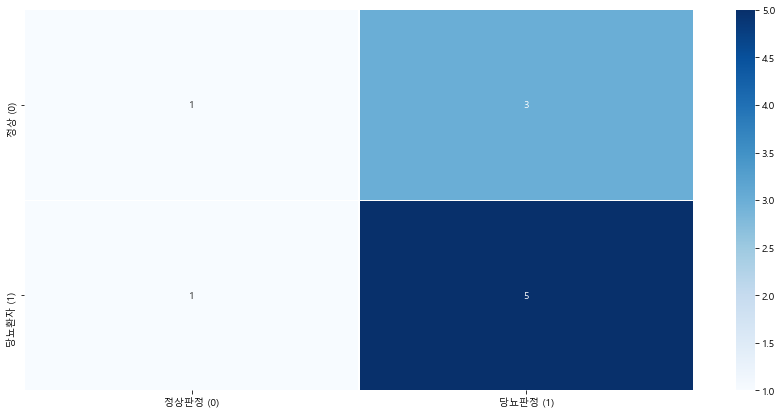

In [ ]:
# y_data = [1,0,0,1,1,1,1,0,0,1]
# y_pred = [0,0,1,1,1,1,1,1,1,1]

cm = confusion_matrix(y_data,y_pred)

plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,cmap='Blues', 
            linewidth=0.1,
            xticklabels=['정상판정 (0)','당뇨판정 (1)'],
            yticklabels=['정상 (0)','당뇨환자 (1)']
            )
plt.show()

![confunsion matrix](images/cm.png)

In [ ]:
# 정밀도 - 0 ~ 1 값 높으면 높을수록 좋음
# Precision이 1.0 이라는 것은 False positive가 0이라는 의미
# 1이라고 예측을 한 값 중에서 따라서 True Positive를 얼마나 예측을 잘했나

precision_score(y_data,y_pred)

0.625

In [ ]:
# 재현율 - 0 ~ 1 값 높으면 높을수록 좋음
# Recall 1.0이라는 의미는 False Negative가 0건이라는 의미입니다.
# 실제 1 값중에서 
recall_score(y_data, y_pred)

0.8333333333333334

In [ ]:
# f1 score - 0 ~ 1 값 높으면 높을수록 좋음
f1_score(y_data, y_pred)

0.7142857142857143

조화 평균 사용 이유 : precision과 recall이 0에 가까울수록 동일한 비율로 F1 score도 동일하게 낮을 값을 갖도록 하기 위함

<img src="images/f1_jowha1.png">

## 1-1.연습문제

피마인디안 데이터를 이용하여 confusion matrix(heatmap), precision, recall, f1 score를 구하기시오

In [ ]:
df = pd.read_csv('datas/pima-indians-diabetes.data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, 
                                                 test_size=0.2, random_state=1, stratify=y_data)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train,y_train)
predict = model.predict(x_test)

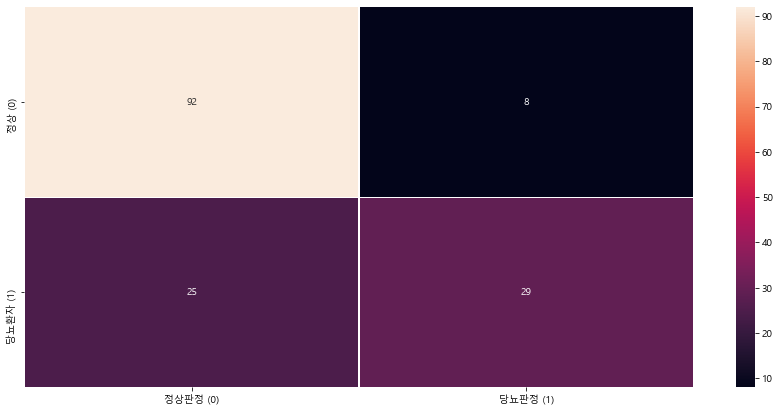

In [ ]:
cm = confusion_matrix(y_test,predict)

plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True,linewidth=0.1,
           yticklabels=['정상 (0)','당뇨환자 (1)'],
           xticklabels=['정상판정 (0)','당뇨판정 (1)'])
plt.show()

In [ ]:
# 정밀도 
print('정밀도 : ',precision_score(y_test,predict))

# 재현율
print('재현율 : ',recall_score(y_test,predict))

# F1 score
print('F1 Score : ',f1_score(y_test,predict))

정밀도 :  0.7837837837837838
재현율 :  0.5370370370370371
F1 Score :  0.6373626373626374


In [ ]:
df = pd.read_csv('datas/pima-indians-diabetes.data.csv')
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

# gridsearch를 통한 최적의 parameter 찾기
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, 
                                                 test_size=0.2, random_state=1, stratify=y_data)

model_logistic = make_pipeline( StandardScaler(), LogisticRegression() )
param_value = {'logisticregression__C': np.linspace(0, 1, 10),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='f1')

In [ ]:
gridS.best_params_

{'logisticregression__C': 0.1111111111111111,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [ ]:
gridS.best_score_

0.646370349529018

In [ ]:
y_predict = gridS.best_estimator_.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [ ]:
f1_score(y_test,y_predict)

0.6304347826086957

# 2.ROC(Receiver Operating Characteristic) curve

ROC(Receiver Operating Characteristic) curves는 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것


In [ ]:
df = pd.read_csv('datas/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
p = model_lr.predict_proba(x_test)
p

array([[0.92550508, 0.07449492],
       [0.83320429, 0.16679571],
       [0.95656634, 0.04343366],
       [0.54861033, 0.45138967],
       [0.70967189, 0.29032811],
       [0.77235432, 0.22764568],
       [0.96908426, 0.03091574],
       [0.90230655, 0.09769345],
       [0.22348191, 0.77651809],
       [0.95068943, 0.04931057],
       [0.7832609 , 0.2167391 ],
       [0.94535595, 0.05464405],
       [0.24730158, 0.75269842],
       [0.9697421 , 0.0302579 ],
       [0.95025231, 0.04974769],
       [0.71092943, 0.28907057],
       [0.727385  , 0.272615  ],
       [0.48200272, 0.51799728],
       [0.85271205, 0.14728795],
       [0.30629606, 0.69370394],
       [0.24898721, 0.75101279],
       [0.91382662, 0.08617338],
       [0.56698805, 0.43301195],
       [0.9694643 , 0.0305357 ],
       [0.76706131, 0.23293869],
       [0.82341565, 0.17658435],
       [0.52886238, 0.47113762],
       [0.91351072, 0.08648928],
       [0.95105008, 0.04894992],
       [0.93233714, 0.06766286],
       [0.

In [ ]:
df = pd.DataFrame( [y_test])
df = df.T
df

,Outcome
488,0
413,0
112,0
222,0
711,0
...,...
139,0
178,0
654,0
110,1


In [ ]:
df['proba'] = p[:,1]
df.sort_values('proba')
# 여기서 porba는 1이 될 확률 
# 0.5가 넘는 것은 1이라도 예측한거임
# 110 같은 경우 proba가 0.5 이상(1로 예측)  실제 값이 1임 맞게 예측
# 178 같은 경우 proba가 0.5 이상(1로 예측) 실제 값이 0임 틀리게 예측

,Outcome,proba
75,0,0.001900
342,0,0.003470
494,0,0.008932
106,0,0.014999
9,1,0.027928
...,...,...
215,1,0.910532
715,1,0.921489
744,0,0.939968
154,1,0.959321


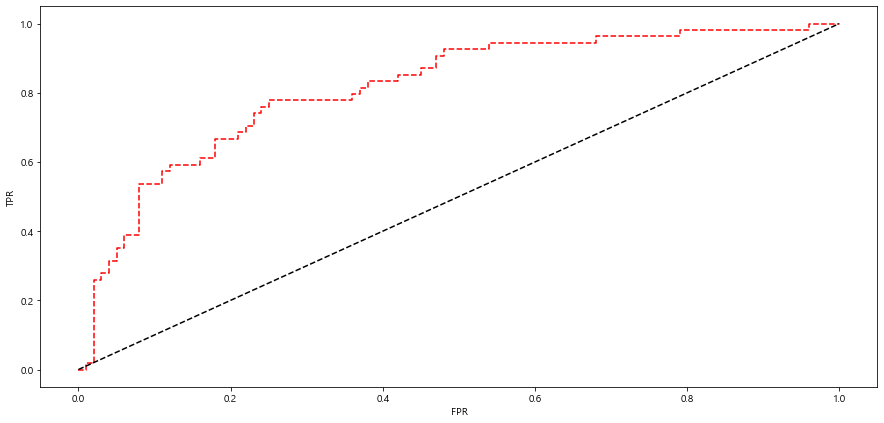

In [ ]:
# roc_curve(y_test, p[:,-1]) # 실제값, 확률값
fpr, tpr, threshold = roc_curve(y_test, df['proba'].values) # 실제값(y_true), 확률값(y_score)

# print(fpr) # False Positive Rate
# print(tpr) # True Positive Rate
# print(threshold) # 판정기준치
# threshold를 낮추게 되면 정탐 비율이 높아지지만 오탐 비율도 높아짐
# threshold를 높이게 되면 오탐 비율이 낮아지지만 정탐 비율도 낮아짐
# roc curve가 중간정도 이상이면 사용이 가능하다는 의미
# https://angeloyeo.github.io/2020/08/05/ROC.html

plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
# 여기서 roc curve가 오른쪽 대각선 위로 갈수록 성능이 좋다는 이야기이다.
# 저 빨간 점선이 roc curve